Mengimpor Library yang diperlukan dalam pembuatan Modelnya

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.utils import resample
from sklearn import metrics
from sklearn.metrics import accuracy_score
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
df = pd.read_csv("/content/sample_data/Dataset.csv")
df

,tgl,nama_peserta,administrasi,teknis,harga,kualifikasi,akhir,target
0,5/7/2021,ORA ET LABORA - 72.376.291.0-952.000,100,90.89,90.90,79.36,90.892,1
1,5/7/2021,CV. DELTA KARYA - 71.954.084.1-952.000,100,88.81,84.70,80.84,87.988,1
2,5/7/2021,CV. TUJUHDUA SEJAHTERA MANDIRI - 03.010.111.7-...,100,92.03,94.68,92.00,92.560,1
3,5/7/2021,CV. KERUB KARYA - 41.992.294.3-952.000,100,61.80,0.00,0.00,49.440,0
4,5/7/2021,cv.baratajayamandiri - 76.636.453.3-953.000,100,87.30,90.90,85.36,88.020,1
...,...,...,...,...,...,...,...,...
245,18/7/2022,Berkah Sejahtera Mandiri - 02.971.133.0-101.000,100,73.40,80.40,81.40,74.800,1
246,18/7/2022,CV PANDU TAMA - 31.266.725.6-421.000,100,76.50,84.60,78.00,78.120,1
247,18/7/2022,CV. ANUGERAH CAHAYA FAJAR PERKASA - 94.855.396...,100,61.60,0.00,0.00,49.280,0
248,18/7/2022,PT. Tetragrammaton Adiyasa Integra - 43.544.86...,100,78.20,91.20,78.20,80.800,1


In [ ]:
df.head(10)

,tgl,nama_peserta,administrasi,teknis,harga,kualifikasi,akhir,target
0,5/7/2021,ORA ET LABORA - 72.376.291.0-952.000,100,90.89,90.90,79.36,90.892,1
1,5/7/2021,CV. DELTA KARYA - 71.954.084.1-952.000,100,88.81,84.70,80.84,87.988,1
2,5/7/2021,CV. TUJUHDUA SEJAHTERA MANDIRI - 03.010.111.7-...,100,92.03,94.68,92.00,92.560,1
3,5/7/2021,CV. KERUB KARYA - 41.992.294.3-952.000,100,61.80,0.00,0.00,49.440,0
4,5/7/2021,cv.baratajayamandiri - 76.636.453.3-953.000,100,87.30,90.90,85.36,88.020,1
5,5/7/2021,CV.BEBAS MANDIRI - 74.641.965.4-953.000,100,72.95,53.50,0.00,69.060,0
6,5/7/2021,CV.BALIM BINO - 70.279.544.4-952.000,100,77.40,31.40,0.00,68.200,0
7,5/7/2021,CV. KRISNA SEJAHTERA - 72.848.949.3-952.000,100,96.35,78.00,87.00,92.680,1
8,5/7/2021,CV. WATANI - 71.885.184.3-952.000,100,93.40,80.40,78.00,90.800,1
9,5/7/2021,CV. SOLUSI ARYA PRIMA - 01.960.937.9-511.000,100,64.00,0.00,0.00,51.200,0


In [ ]:
df.tail(10)

,tgl,nama_peserta,administrasi,teknis,harga,kualifikasi,akhir,target
240,18/7/2022,PT. ANUGRAH GLOBAL TEKNOLOGI - 76.102.315.9-61...,100,85.00,88.20,94.71,85.64,1
241,18/7/2022,SENTRA SOLUSINDO - 85.134.510.8-508.000,100,80.30,84.60,81.50,81.16,1
242,18/7/2022,CV. SETIA AGUNG NIAGA - 03.029.903.6-922.000,100,77.70,90.90,87.40,80.34,1
243,18/7/2022,PT. MITRA EDUKASI NUSANTARA - 84.911.770.0-509...,100,76.50,23.40,0.00,65.88,0
244,18/7/2022,CV BERKAT ANUGRAH - 82.420.429.1-602.000,100,78.60,78.40,84.10,78.56,1
245,18/7/2022,Berkah Sejahtera Mandiri - 02.971.133.0-101.000,100,73.40,80.40,81.40,74.80,1
246,18/7/2022,CV PANDU TAMA - 31.266.725.6-421.000,100,76.50,84.60,78.00,78.12,1
247,18/7/2022,CV. ANUGERAH CAHAYA FAJAR PERKASA - 94.855.396...,100,61.60,0.00,0.00,49.28,0
248,18/7/2022,PT. Tetragrammaton Adiyasa Integra - 43.544.86...,100,78.20,91.20,78.20,80.80,1
249,18/7/2022,BUMI JAYA BARU - 75.258.265.0-435.000,100,87.18,94.68,77.96,88.68,1


In [ ]:
df.isna().sum()

tgl             0
nama_peserta    0
administrasi    0
teknis          0
harga           0
kualifikasi     0
akhir           0
target          0
dtype: int64

In [ ]:
df_missing_value = df.dropna(axis=0)

In [ ]:
df_missing_value

,tgl,nama_peserta,administrasi,teknis,harga,kualifikasi,akhir,target
0,5/7/2021,ORA ET LABORA - 72.376.291.0-952.000,100,90.89,90.90,79.36,90.892,1
1,5/7/2021,CV. DELTA KARYA - 71.954.084.1-952.000,100,88.81,84.70,80.84,87.988,1
2,5/7/2021,CV. TUJUHDUA SEJAHTERA MANDIRI - 03.010.111.7-...,100,92.03,94.68,92.00,92.560,1
3,5/7/2021,CV. KERUB KARYA - 41.992.294.3-952.000,100,61.80,0.00,0.00,49.440,0
4,5/7/2021,cv.baratajayamandiri - 76.636.453.3-953.000,100,87.30,90.90,85.36,88.020,1
...,...,...,...,...,...,...,...,...
245,18/7/2022,Berkah Sejahtera Mandiri - 02.971.133.0-101.000,100,73.40,80.40,81.40,74.800,1
246,18/7/2022,CV PANDU TAMA - 31.266.725.6-421.000,100,76.50,84.60,78.00,78.120,1
247,18/7/2022,CV. ANUGERAH CAHAYA FAJAR PERKASA - 94.855.396...,100,61.60,0.00,0.00,49.280,0
248,18/7/2022,PT. Tetragrammaton Adiyasa Integra - 43.544.86...,100,78.20,91.20,78.20,80.800,1


Mengetahui Informasi tentang Tipe data dan Ukuran Data

In [ ]:
df_missing_value.isna().sum()

tgl             0
nama_peserta    0
administrasi    0
teknis          0
harga           0
kualifikasi     0
akhir           0
target          0
dtype: int64

In [ ]:
df_missing_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tgl           250 non-null    object 
 1   nama_peserta  250 non-null    object 
 2   administrasi  250 non-null    int64  
 3   teknis        250 non-null    float64
 4   harga         250 non-null    float64
 5   kualifikasi   250 non-null    float64
 6   akhir         250 non-null    float64
 7   target        250 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 17.6+ KB


In [ ]:
df_missing_value['harga'] = df_missing_value['harga'].astype('float')
df_missing_value['target'] = df_missing_value['target'].astype('int')
df_missing_value['akhir'] = df_missing_value['akhir'].astype('float')
df_missing_value['target'] = df_missing_value['target'].astype('int')

In [ ]:
df_missing_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tgl           250 non-null    object 
 1   nama_peserta  250 non-null    object 
 2   administrasi  250 non-null    int64  
 3   teknis        250 non-null    float64
 4   harga         250 non-null    float64
 5   kualifikasi   250 non-null    float64
 6   akhir         250 non-null    float64
 7   target        250 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 17.6+ KB


In [ ]:
df_missing_value

,tgl,nama_peserta,administrasi,teknis,harga,kualifikasi,akhir,target
0,5/7/2021,ORA ET LABORA - 72.376.291.0-952.000,100,90.89,90.90,79.36,90.892,1
1,5/7/2021,CV. DELTA KARYA - 71.954.084.1-952.000,100,88.81,84.70,80.84,87.988,1
2,5/7/2021,CV. TUJUHDUA SEJAHTERA MANDIRI - 03.010.111.7-...,100,92.03,94.68,92.00,92.560,1
3,5/7/2021,CV. KERUB KARYA - 41.992.294.3-952.000,100,61.80,0.00,0.00,49.440,0
4,5/7/2021,cv.baratajayamandiri - 76.636.453.3-953.000,100,87.30,90.90,85.36,88.020,1
...,...,...,...,...,...,...,...,...
245,18/7/2022,Berkah Sejahtera Mandiri - 02.971.133.0-101.000,100,73.40,80.40,81.40,74.800,1
246,18/7/2022,CV PANDU TAMA - 31.266.725.6-421.000,100,76.50,84.60,78.00,78.120,1
247,18/7/2022,CV. ANUGERAH CAHAYA FAJAR PERKASA - 94.855.396...,100,61.60,0.00,0.00,49.280,0
248,18/7/2022,PT. Tetragrammaton Adiyasa Integra - 43.544.86...,100,78.20,91.20,78.20,80.800,1


In [ ]:
df_cleaning = df_missing_value.drop(columns=['tgl','nama_peserta'],axis=1)

In [ ]:
df_cleaning

,administrasi,teknis,harga,kualifikasi,akhir,target
0,100,90.89,90.90,79.36,90.892,1
1,100,88.81,84.70,80.84,87.988,1
2,100,92.03,94.68,92.00,92.560,1
3,100,61.80,0.00,0.00,49.440,0
4,100,87.30,90.90,85.36,88.020,1
...,...,...,...,...,...,...
245,100,73.40,80.40,81.40,74.800,1
246,100,76.50,84.60,78.00,78.120,1
247,100,61.60,0.00,0.00,49.280,0
248,100,78.20,91.20,78.20,80.800,1


In [ ]:
df_missing_value.shape

(250, 8)

In [ ]:
df_missing_value['target'].value_counts()

1    130
0    120
Name: target, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


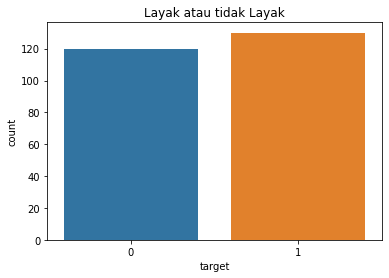

In [ ]:
sns.countplot(df_missing_value['target'])
plt.title("Layak atau tidak Layak")
plt.ioff()
pass

In [ ]:
df_majority = df_missing_value[(df_missing_value['target']==1)] 
df_minority = df_missing_value[(df_missing_value['target']==0)] 

df_majority_downsampled = resample(df_majority, 
                                  replace=True,   
                                  n_samples= 120, 
                                random_state=42)
df_downsampled= pd.concat([df_majority_downsampled, df_minority])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


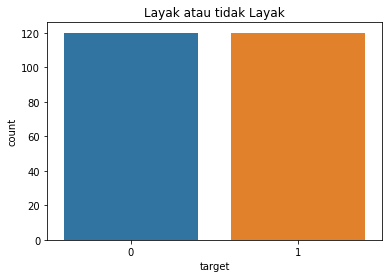

In [ ]:
sns.countplot(df_downsampled['target'])
plt.title("Layak atau tidak Layak")
plt.ioff()
pass

In [ ]:
df_downsampled['target'].value_counts()

1    120
0    120
Name: target, dtype: int64

In [ ]:
df_resampling = df_downsampled.drop(columns=['tgl','nama_peserta'],axis=1)

In [ ]:
df_resampling

,administrasi,teknis,harga,kualifikasi,akhir,target
205,100,71.10,71.1,72.1,71.100,1
180,100,78.20,83.3,78.2,79.220,1
23,100,72.10,87.3,76.2,75.140,1
210,100,93.86,76.5,90.3,90.388,1
120,100,86.30,84.2,88.4,85.880,1
...,...,...,...,...,...,...
232,100,33.50,0.0,0.0,26.800,0
233,100,63.60,0.0,0.0,50.880,0
237,100,87.20,89.2,33.4,87.600,0
243,100,76.50,23.4,0.0,65.880,0


In [ ]:
X = df_resampling.drop(columns=['target'],axis=1).values
Y = df_resampling['target']

In [ ]:
X

array([[100.  ,  71.1 ,  71.1 ,  72.1 ,  71.1 ],
       [100.  ,  78.2 ,  83.3 ,  78.2 ,  79.22],
       [100.  ,  72.1 ,  87.3 ,  76.2 ,  75.14],
       ...,
       [100.  ,  87.2 ,  89.2 ,  33.4 ,  87.6 ],
       [100.  ,  76.5 ,  23.4 ,   0.  ,  65.88],
       [100.  ,  61.6 ,   0.  ,   0.  ,  49.28]])

In [ ]:
Y

205    1
180    1
23     1
210    1
120    1
      ..
232    0
233    0
237    0
243    0
247    0
Name: target, Length: 240, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
ANN_model = Sequential()
ANN_model.add(Dense(units=1,input_shape=(5,),activation='sigmoid'))

In [ ]:
ANN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.3)

ANN_model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics= ['accuracy'])

In [ ]:
history = ANN_model.fit(X_train, Y_train, epochs=20, batch_size=32,validation_split=0.3,shuffle=False)

Epoch 1/20
4/4 [==============================] - 1s 57ms/step - loss: 28.1039 - accuracy: 0.5128 - val_loss: 5.5858 - val_accuracy: 0.4706
Epoch 2/20
4/4 [==============================] - 0s 11ms/step - loss: 3.9579 - accuracy: 0.6496 - val_loss: 0.7563 - val_accuracy: 0.9608
Epoch 3/20
4/4 [==============================] - 0s 13ms/step - loss: 1.7483 - accuracy: 0.9487 - val_loss: 4.5767 - val_accuracy: 0.9412
Epoch 4/20
4/4 [==============================] - 0s 12ms/step - loss: 4.6093 - accuracy: 0.9402 - val_loss: 4.8490 - val_accuracy: 0.9412
Epoch 5/20
4/4 [==============================] - 0s 11ms/step - loss: 3.9452 - accuracy: 0.9402 - val_loss: 2.4804 - val_accuracy: 0.9412
Epoch 6/20
4/4 [==============================] - 0s 11ms/step - loss: 0.8935 - accuracy: 0.9487 - val_loss: 0.4785 - val_accuracy: 0.8824
Epoch 7/20
4/4 [==============================] - 0s 11ms/step - loss: 0.8063 - accuracy: 0.8718 - val_loss: 0.5054 - val_accuracy: 0.9608
Epoch 8/20
4/4 [==========

In [ ]:
y_pred = np.around(ANN_model.predict(X_test))
print("Test Accucary: ", accuracy_score(Y_test,y_pred))

3/3 [==============================] - 0s 3ms/step
Test Accucary:  0.9722222222222222


In [ ]:
print(metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.97      0.97      0.97        35

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



In [ ]:
print(metrics.confusion_matrix(Y_test, y_pred))

[[36  1]
 [ 1 34]]


In [ ]:
weights = ANN_model.get_weights()
weights

[array([[-0.7327403 ],
        [-0.69203216],
        [ 0.9651799 ],
        [ 2.272075  ],
        [-1.2246765 ]], dtype=float32), array([-1.0618618], dtype=float32)]

In [ ]:
# Dengan Data Testing Layak

'''Data : 100,86.3,84.2,82.3,85.88'''

x1= 100     
w1= -0.7591232
x2= 86.3   
w2= -0.72252977
x3= 84.2
w3=  0.97142226
x4= 82.3
w4= 2.2691996
x5= 85.88 
w5= -1.1253885

target = 1
b =  -1.0882452

#mencari hasil ANN
y = ((x1*w1) + (x2*w2) + (x3*w3) + (x4*w4) + (x5*w5) + b)
#mencari hasil Aktivasi
z = 1 / (1 + np.exp(-y))
#mencari error dengan Binary Cross-Entropy
e = (target-z**2)

print (y)
print(z) # atau 99.99%
print(e) # atau  0.00000014%

32.545632641
0.9999999999999927
1.4654943925052066e-14


In [ ]:
weights = ANN_model.get_weights()
weights

[array([[-0.7327403 ],
        [-0.69203216],
        [ 0.9651799 ],
        [ 2.272075  ],
        [-1.2246765 ]], dtype=float32), array([-1.0618618], dtype=float32)]

In [ ]:
# Dengan Data Testing Tidak Layak

'''Data : 100,61.6,0,0,49.28, 0'''

x1= 100
w1= -0.7591232
x2= 61.6
w2= -0.72252977
x3= 0
w3= 0.97142226
x4= 0
w4= 2.2691996
x5= 49.28
w5= -1.1253885

target_2 = 0
b_2 = -1.0882452

#mencari hasil ANN
y_2 = ((x1*w1) + (x2*w2) + (x3*w3) + (x4*w4) + (x5*w5) + b_2)
#mencari hasil Aktivasi
z_2 = 1 / (1 + np.exp(-y_2))
#mencari error dengan Binary Cross-Entropy
e_2 = (target-z_2**2)

print(y_2)
print(z_2) # atau 0.00000077%
print(e_2) 

-176.96754431199997
1.393067079780278e-77
1.0


In [ ]:
predictions = (ANN_model.predict(X_test)>0.5).astype('int')

3/3 [==============================] - 0s 3ms/step


In [ ]:
# Menguji Kelayakan Model Appying dengan 1 Kasus Contoh dari Data Testing Layak
'''
Contoh Data : 100,86.3,84.2,82.3,85.88
Evaluasi Administrasi : 100
Evaluasi Teknis : 86.3
Evaluasi Harga : 84.2
Evaluasi Kualifikasi : 82.3
Nilai Akhir : 85.88
'''
input_data = (100,86.3,84.2,82.3,85.88) 
input_data_as_numpy = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy.reshape(1,-1)
prediction = ANN_model.predict(input_data_reshaped)
print("Output Harapan :", prediction)
print("Output Hasil :", z)

if(prediction[0]>=0.5):
  print("Hasil Prediksi klasifikasi  :",np.ceil(prediction))
  print("Peserta Lulus Seleksi Tender")
else:
  print("Hasil Prediksi klasifikasi  :",np.floor(prediction))
  print("Peserta Tidak Lulus Seleksi Tender")

1/1 [==============================] - 0s 18ms/step
Output Harapan : [[1.]]
Output Hasil : 0.9999999999999927
Hasil Prediksi klasifikasi  : [[1.]]
Peserta Lulus Seleksi Tender


In [ ]:
# Menguji Kelayakan Model Appying dengan 1 Kasus Contoh dari Data Testing Tidak Lulus

'''Contoh Data : 100,61.6,0,0,49.28,0
Evaluasi Administrasi : 100
Evaluasi Teknis : 61.6
Evaluasi Harga : 0
Evaluasi Kualifikasi : 0
Hasil Akhir : 49.28'''

input_data = (100,61.6,0,0,49.28) 
input_data_as_numpy = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy.reshape(1,-1)
prediction = ANN_model.predict(input_data_reshaped)
print("Output Harapan :", prediction)
print("Output Hasil :", z_2)

if(prediction[0]>=0.5):
  print("Hasil Prediksi klasifikasi  :",np.ceil(prediction))
  print("Peserta Lulus Seleksi Tender")
else:
  print("Hasil Prediksi klasifikasi  :",np.floor(prediction))
  print("Peserta Tidak Lulus Seleksi Tender")

1/1 [==============================] - 0s 20ms/step
Output Harapan : [[0.]]
Output Hasil : 1.393067079780278e-77
Hasil Prediksi klasifikasi  : [[0.]]
Peserta Tidak Lulus Seleksi Tender
